Name: Aryaman Pillay

In [ ]:
#importing the all neccessary libararies
import numpy as nps
import pandas as pd
import matplotlib.pyplot as plt

# Reading and Understanding Data

### Read the data from csv file

In [111]:
basePath = '/Users/aryamanpillay/Downloads/' #initialising the directory path where the input csv file is
fileName = 'weather.data.csv' #name of the csv file
df = pd.read_csv(basePath+fileName) #reading the csv file using pandas
print("Reading CSV successfully! DF contents are as follows : ")
print(df)

Reading CSV successfully! DF contents are as follows : 
      upper  lower  rain  month    yr
0      10.8    6.5  12.2      1  1987
1      10.5    4.5   1.3      1  1987
2       7.5   -1.0   0.1      1  1987
3       6.5   -3.3   1.1      1  1987
4      10.0    5.0   3.5      1  1987
...     ...    ...   ...    ...   ...
6935    5.0   -2.5   0.2     12  2005
6936    2.0   -3.5   0.3     12  2005
6937    1.5   -2.5   0.0     12  2005
6938    3.0   -2.5   3.0     12  2005
6939   10.0    1.3  10.5     12  2005

[6940 rows x 5 columns]


Understanding of the dataset is as follows:
It consists weather data from the year 1987 until 2005, it records the temperatures as well as the rainfall for every day in the duration

#### Print the top 10 rows to peep into data

In [112]:
df.head(10) #printing the first 10 rows of the data

,upper,lower,rain,month,yr
0,10.8,6.5,12.2,1,1987
1,10.5,4.5,1.3,1,1987
2,7.5,-1.0,0.1,1,1987
3,6.5,-3.3,1.1,1,1987
4,10.0,5.0,3.5,1,1987
5,8.0,3.0,0.1,1,1987
6,5.8,-3.3,0.0,1,1987
7,2.8,-5.5,0.0,1,1987
8,-0.8,-4.8,0.0,1,1987
9,1.5,-1.0,0.0,1,1987


In [113]:
df.shape #printing the shape(rows * cols) of dataframe

(6940, 5)

In [114]:
df.columns #printing the names of the columns

Index(['upper', 'lower', 'rain', 'month', 'yr'], dtype='object')

In [115]:
df.dtypes #printing the data types found in the column

upper    float64
lower    float64
rain     float64
month      int64
yr         int64
dtype: object

In [116]:
df.info() #overall information of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6940 entries, 0 to 6939
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   upper   6940 non-null   float64
 1   lower   6940 non-null   float64
 2   rain    6940 non-null   float64
 3   month   6940 non-null   int64  
 4   yr      6940 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 271.2 KB


In [117]:
df.describe() #printing the count, min, max, std

,upper,lower,rain,month,yr
count,6940.000000,6940.000000,6940.000000,6940.000000,6940.000000
mean,14.953545,6.080259,1.832334,6.522478,1995.999424
std,6.407824,5.235369,4.072647,3.449165,5.477804
min,-6.800000,-11.500000,0.000000,1.000000,1987.000000
25%,10.300000,2.500000,0.000000,4.000000,1991.000000
50%,14.500000,6.400000,0.000000,7.000000,1996.000000
75%,19.500000,10.000000,1.600000,10.000000,2001.000000
max,36.800000,26.500000,59.500000,12.000000,2005.000000


In [57]:
df.isnull().sum() #checking the null values in the dataframe to determine if cleaning is needed

upper    0
lower    0
rain     0
month    0
yr       0
dtype: int64

# Analysis of Data using Visualization

In [58]:
import seaborn as sns


In [65]:
def create_histogram(column_name):
    # Plot histogram
    plt.hist(df[column_name], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title('Histogram of {}'.format(column_name))
    plt.grid(True)  # Add grid for better visualization
    plt.show()
    

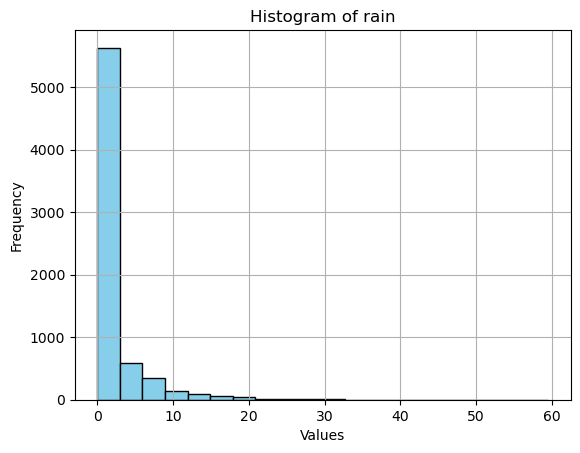

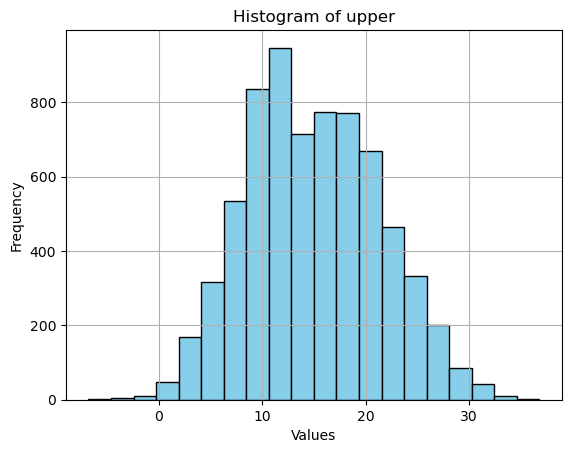

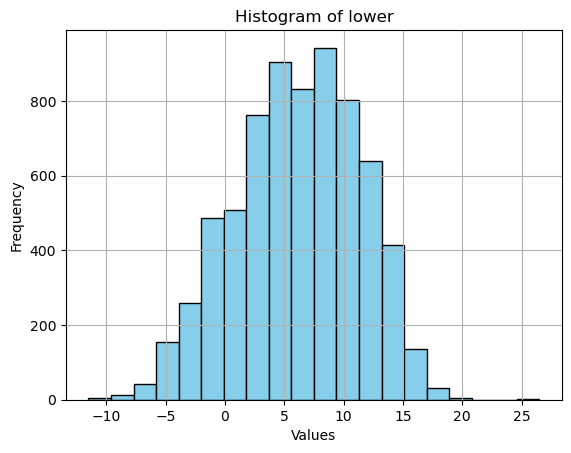

In [66]:
# creating a histogram below to better understand the distribution of data
create_histogram('rain')
create_histogram('upper')
create_histogram('lower')



Interpretation from the histogram is :
Lower: Most of the days have temperature between 3.5 to 9 degree (tallest 3 bins)  approx and there are a few days where the lowest temperature is above 17 degrees
Upper: There are very few days where the temperature exceeds 30 degree but also some days have a maximum temperature below 0 degree. The tallest 2 bins have a temperature from 8 to 12 degrees
Rain : As seen most of the days have rains below 5 

#### Understanding the total rains 

In [118]:
# printing the total rain per year
df.groupby(['yr'])['rain'].sum()

yr
1987    724.3
1988    609.9
1989    642.6
1990    491.5
1991    535.6
1992    680.8
1993    746.3
1994    764.8
1995    623.7
1996    507.0
1997    537.7
1998    737.6
1999    776.0
2000    921.9
2001    821.7
2002    901.8
2003    552.4
2004    614.3
2005    526.5
Name: rain, dtype: float64

In [121]:
#printing the total rain per month per year
df.groupby(['yr', 'month'])['rain'].sum()

yr    month
1987  1        26.4
      2        34.6
      3        57.9
      4        48.5
      5        55.1
               ... 
2005  8        74.3
      9        46.4
      10       75.5
      11       43.5
      12       55.4
Name: rain, Length: 228, dtype: float64

In [84]:
def plot_graph_weather_changes(month, month_fullform):
    month_data = df[df['month'] == month]
    # Group the data by year and calculate the mean for each year
    yearly_means = month_data.groupby('yr').mean()
    
    # Plot upper temperature
    plt.plot(yearly_means.index, yearly_means['upper'], label='Upper Temperature')

    # Plot lower temperature
    plt.plot(yearly_means.index, yearly_means['lower'], label='Lower Temperature')

    # Plot rainfall
    plt.plot(yearly_means.index, yearly_means['rain'], label='Rainfall')

    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.title('Weather Data Changes over the Years for '+month_fullform)
    plt.legend()  # Show legend
    plt.grid(True)  # Add grid
    plt.show()

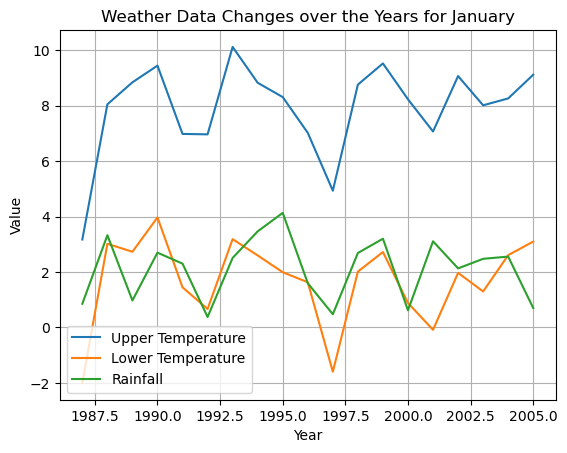

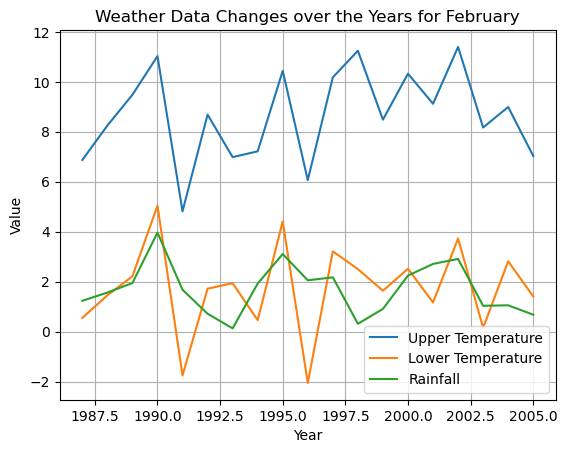

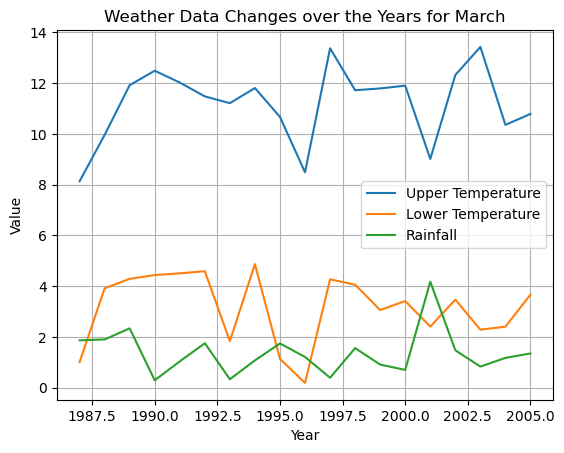

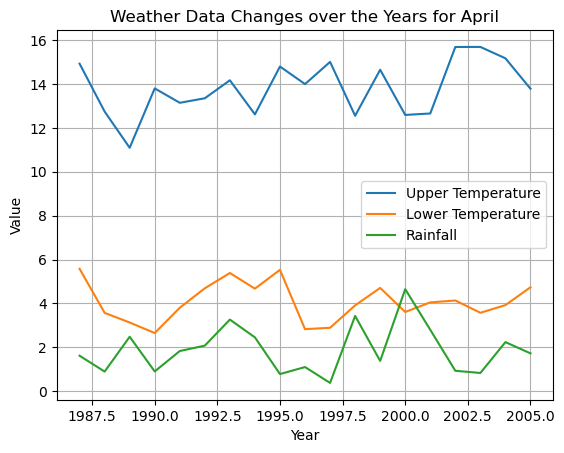

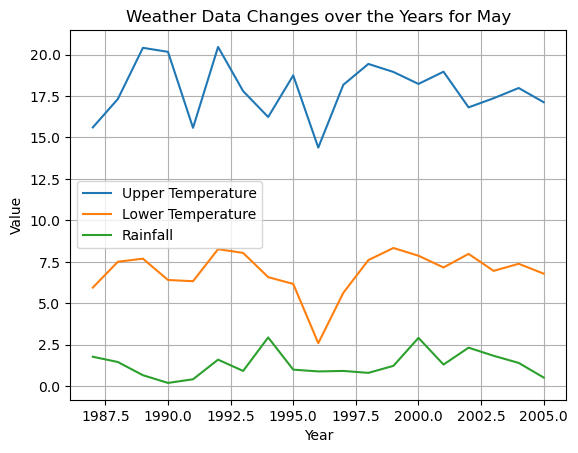

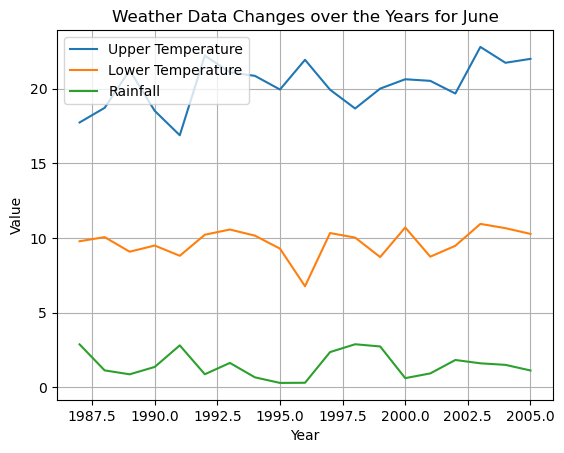

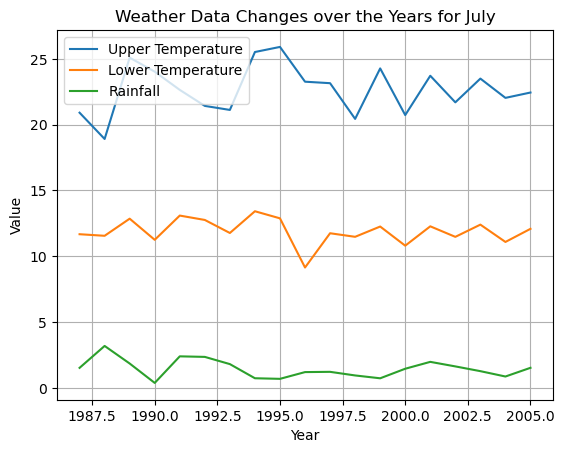

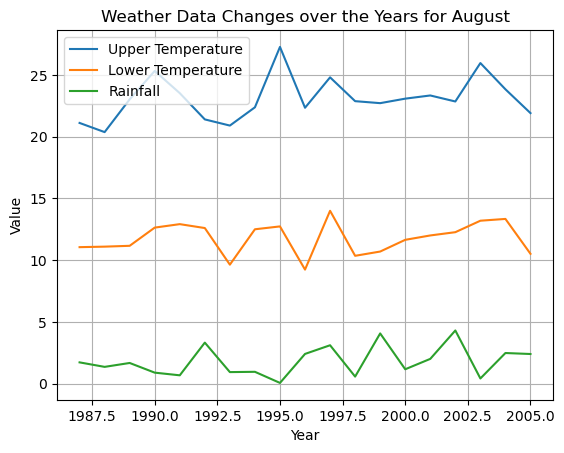

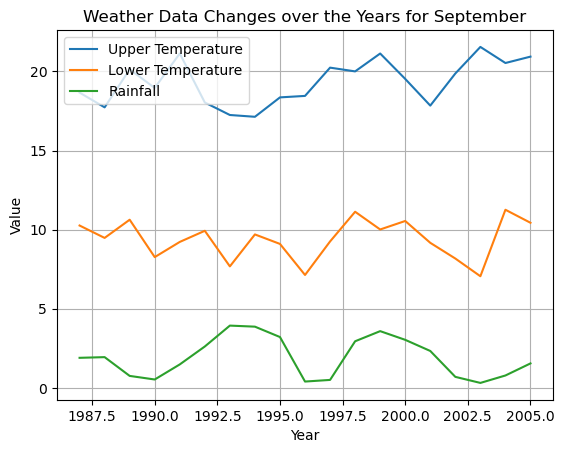

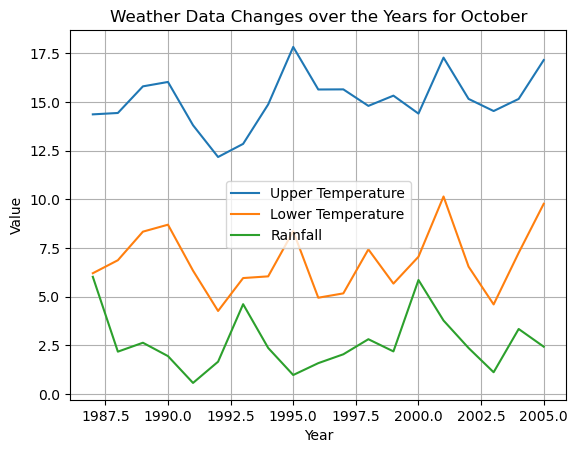

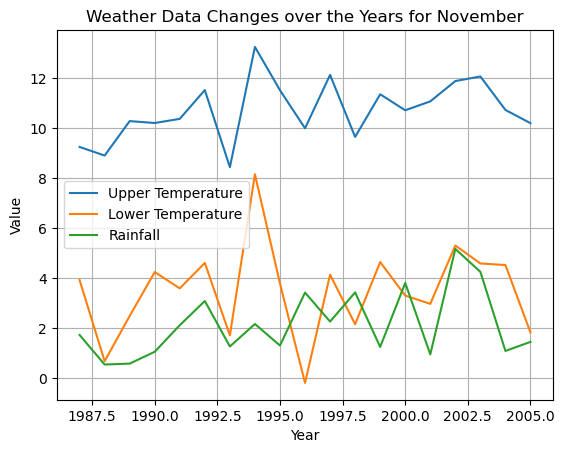

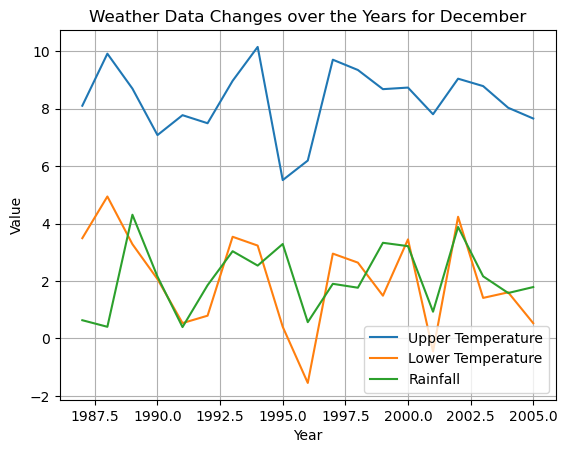

In [85]:
#graph for the temperature changes over the years

months_full_form = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
for i in range(12):
    plot_graph_weather_changes(i+1, months_full_form[i])

<Axes: >

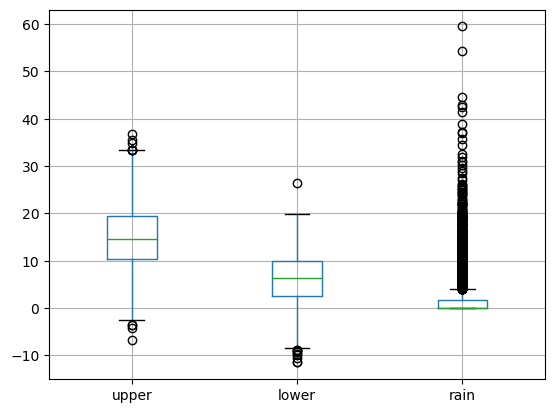

In [122]:
# visual representation of the outliers

df[["upper","lower","rain"]].boxplot()

#### Analysis of temperature with top 10 days in each category

In [126]:
ascending_sorted_df = df.sort_values(by='lower', ascending=True)
# Display the ascending sorted DataFrame
print("Data in ascending order of 'lower' temperarure")
print(ascending_sorted_df.head(10))
descending_sorted_df = df.sort_values(by='lower', ascending=False)
# Display the ascending sorted DataFrame
print("Data in descending order of 'lower' temperarure")
print(descending_sorted_df.head(10))
ascending_sorted_df = df.sort_values(by='upper', ascending=True)
# Display the ascending sorted DataFrame
print("Data in ascending order of 'upper' temperarure")
print(ascending_sorted_df.head(10))
descending_sorted_df = df.sort_values(by='upper', ascending=False)
# Display the descending sorted DataFrame
print("\nData in descending order of 'upper' temperature:")
print(descending_sorted_df.head(10))


Data in ascending order of 'lower' temperarure
      upper  lower  rain  month    yr
11     -3.5  -11.5   0.7      1  1987
12     -6.8  -11.3   0.3      1  1987
1806    0.5  -10.5   0.0     12  1991
3654   -2.0  -10.0   0.0      1  1997
30      1.8   -9.8   0.0      1  1987
1807   -0.2   -9.2   0.0     12  1991
5479    3.0   -9.0   0.0      1  2002
1805    3.0   -8.8   0.0     12  1991
31      3.8   -8.8   0.0      2  1987
1849   -1.8   -8.5   0.0      1  1992
Data in descending order of 'lower' temperarure
      upper  lower  rain  month    yr
3145   29.0   26.5   0.0      8  1995
2773   29.5   19.8   0.0      8  1994
1699   26.3   19.0   0.0      8  1991
6430   30.5   19.0   0.8      8  2004
3122   25.5   19.0   0.0      7  1995
3887   23.5   19.0   0.0      8  1997
3886   25.8   18.8   0.1      8  1997
3888   26.3   18.5   0.7      8  1997
3136   32.0   18.5   0.0      8  1995
2769   30.5   18.3   0.0      7  1994
Data in ascending order of 'upper' temperarure
      upper  lower  ra

In [104]:
# printing total rains in descending order month wise
print("Rains in descending order")
df.groupby(["yr", "month"])[["rain"]].sum().sort_values("rain",ascending=False).head(10)

Rains in descending order


,,rain
yr,month,
1987,10,186.8
2000,10,181.7
2002,11,155.2
1993,10,143.2
2000,4,139.5
1989,12,133.5
2002,8,133.4
2001,3,129.5
1995,1,128.1


In [105]:
# printing total rains in ascending order month wise
print("Rains in ascending order")
df.groupby(["yr", "month"])[["rain"]].sum().sort_values("rain",ascending=True).head(10)

Rains in ascending order


,,rain
yr,month,
1995,8,1.7
1993,2,3.7
1990,5,6.2
1995,6,8.2
1998,2,8.8
1996,6,8.8
1990,3,9.1
2003,9,9.4
1993,3,10.4


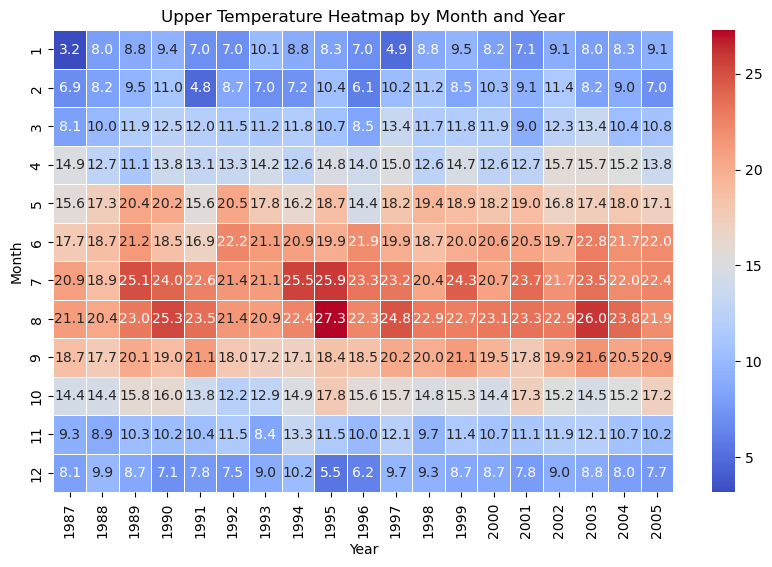

In [106]:
heatmap_data = df.pivot_table(index='month', columns='yr', values='upper')
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)
plt.title('Upper Temperature Heatmap by Month and Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()


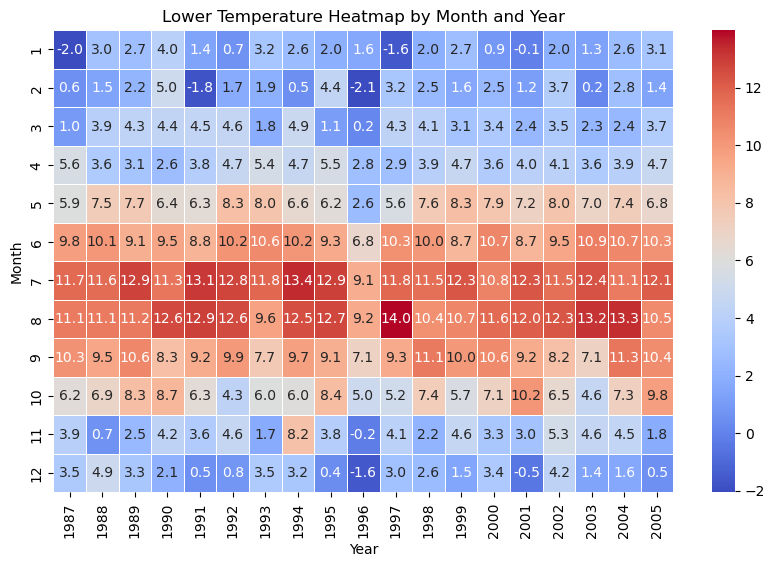

In [108]:
heatmap_data = df.pivot_table(index='month', columns='yr', values='lower')
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)
plt.title('Lower Temperature Heatmap by Month and Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

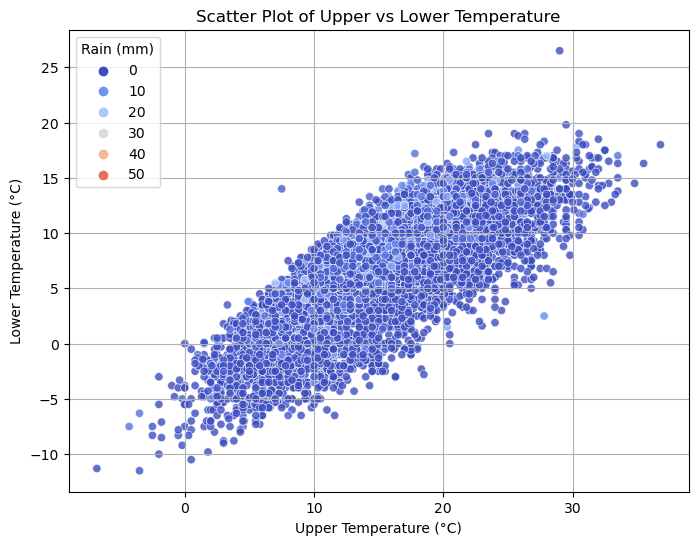

In [109]:
# Create the scatter plot
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.scatterplot(data=df, x='upper', y='lower', hue='rain', palette='coolwarm', alpha=0.8)
plt.title('Scatter Plot of Upper vs Lower Temperature')
plt.xlabel('Upper Temperature (°C)')
plt.ylabel('Lower Temperature (°C)')
plt.legend(title='Rain (mm)', loc='upper left')
plt.grid(True)  # Add grid for better visualization
plt.show()


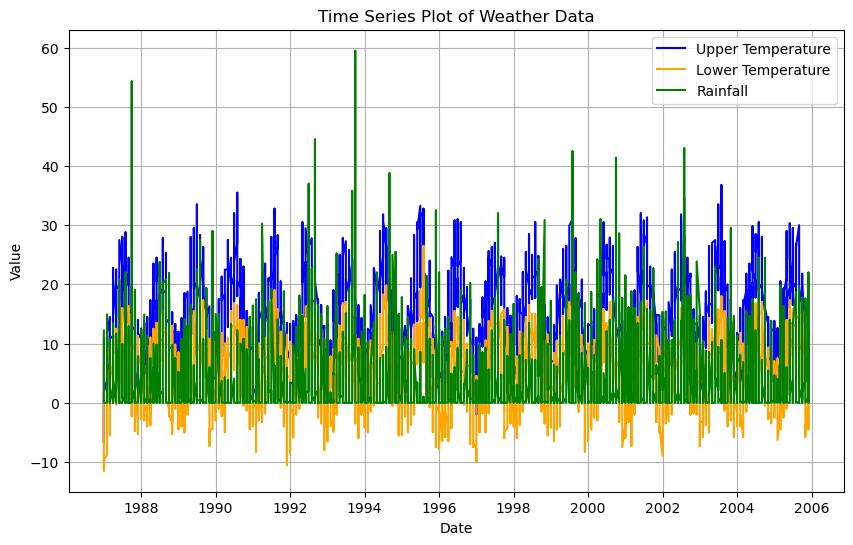

In [110]:
df['date'] = pd.to_datetime(df['yr'].astype(str) + '-' + df['month'].astype(str), format='%Y-%m')
df.set_index('date', inplace=True)

# Create the time series plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(df.index, df['upper'], label='Upper Temperature', color='blue')
plt.plot(df.index, df['lower'], label='Lower Temperature', color='orange')
plt.plot(df.index, df['rain'], label='Rainfall', color='green')
plt.title('Time Series Plot of Weather Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)  # Add grid for better visualization
plt.show()

The time series graph above is a graoh which shows how the weather attributes changed over the years, its easy to undertsnad that some days in 1994 had the highest rain. 


### Conclusion : Using the various graphs gave a great visual representation of the data values, I learnt about the maximum, minimum as well as about the outliers in the dataset. The importance of using contrasting colors in heatmap also went well with me as I was able to see the warmest and coolest days respectively